In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#plt.style.use(['ggplot'])

# Veri Oluşturma

<h5> Bazı veriler oluşturma:
\begin{equation} \theta_0= 4 \end{equation} 
\begin{equation} \theta_1= 3 \end{equation} 

Verileri Gauss gürültü ekleme
    

In [ ]:
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

X ve Y arasındaki ilişkiyi görmek için veriyi çizdirme

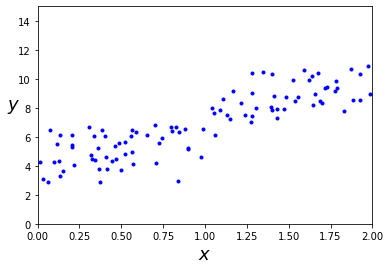

In [ ]:

plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

# Doğrusal Regresyon için Analitik Yol

In [ ]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.03782342]
 [3.14696351]]


<h5>Bu, gerçek tetalarımız 4 ve 3'e yakındır. Verilere getirdiğim gürültü nedeniyle doğru olamaz.

In [ ]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.03782342],
       [10.33175044]])

<h5>Hesaplama ile tahmin doğrusunu çizelim

(0.0, 2.0, 0.0, 15.0)

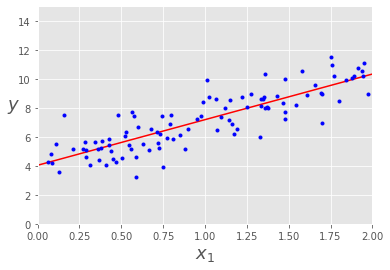

In [ ]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])


# Dereceli Azaltma

## Maliyet Fonksiyonu ve Gradyanlar

<h4> Maliyet fonksiyonunu ve gradyanları hesaplamak için denklem aşağıda gösterildiği gibidir. Maliyet fonksiyonunun Lineer regresyon için olduğunu unutmayın. Diğer algoritmalar için maliyet fonksiyonu farklı olacaktır ve gradyanların maliyet fonksiyonlarından türetilmesi gerekecektir.



<b>Maliyet</b>
\begin{equation}
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
\end{equation}

<b>Gradyan</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Gradyanlar</b>
\begin{equation}
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [ ]:

def  cal_cost(theta,X,y):
    '''
    
    Verilen X ve Y için maliyet hesapla. Aşağıda tek boyutlu X 
    theta = Vector of thetas 
    X     = X'in satırı np.zeros((2,j))
    y     =gerçek y'ler np.zeros((2,1))
    
    Burada:
        j özellik sayısıdır
    '''
    
    m = len(y)
    
    predictions = X.dot(theta) # hteta(x)=teta0+teta1*X
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost


In [ ]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Ek bias birimleriyle X matrisi
    y    = Y vektörü
    theta=teta vektörü np.random.randn(j,1)
    learning_rate: öğrenme oranı 
    iterations = iterasyon sayısı
    
   Iterasyon sayısı üzerinden son teta vektörünü ve maliyet geçmişi dizisini döndürür
    '''
    m = len(y)
    cost_history = np.zeros(iterations)# cost_history=[0 0 0 0 0]
    theta_history = np.zeros((iterations,2)) #teta=[0  0; 0 0; 0 0]
    for it in range(iterations):
        
        prediction = np.dot(X,theta)# hteta(x)=teta0+teta1*X
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history
        
    
    

<h3> 1000 yineleme ve 0.01'lik bir öğrenme oranı ile başlayalım.

In [ ]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Teta0:          {:0.3f},\nTeta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Son Maliyet/MSE:  {:0.3f}'.format(cost_history[-1]))

Teta0:          4.130,
Teta1:          3.065
Son Maliyet/MSE:  5562.522


<h3> Iterasyon boyunca maliyeti çizdirelim

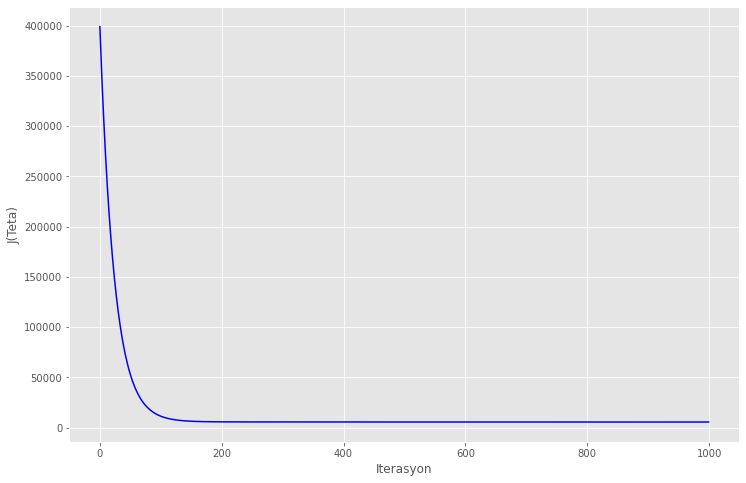

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Teta)')
ax.set_xlabel('Iterasyon')
_=ax.plot(range(n_iter),cost_history,'b-')

<h3> Yaklaşık 150 yinelemeden sonra maliyet sabittir, bu nedenle kalan yinelemelere gerek kalmaz veya daha fazla optimizasyonla sonuçlanmaz. 200 iterasyona kadar yakınlaştıralım ve eğriyi görelim

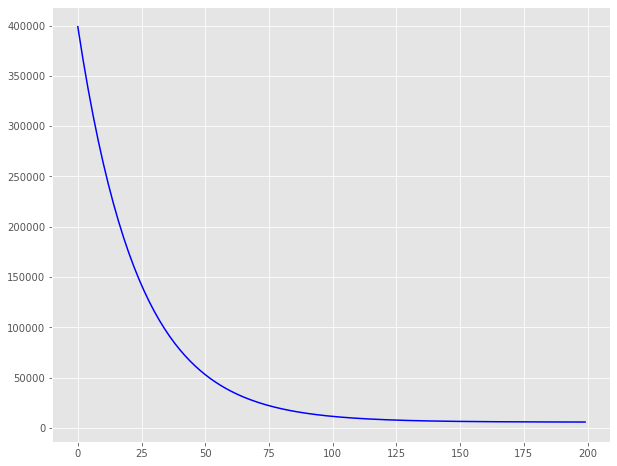

In [ ]:

fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),cost_history[:200],'b-')

<b>Maliyetin başlangıçta daha hızlı düştüğünü ve daha sonra maliyet düşürmedeki kazancın o kadar fazla olmadığını belirtmekte fayda var.

### Efektleri birlikte gösterebilecek bir fonksiyon oluşturalım ve ayrıca degradenin gerçekte nasıl çalıştığını gösterelim.

In [ ]:

def plot_GD(n_iter,lr,ax,ax1=None):
     """
     n_iter =Iterasyon sayısı
     lr = Öğrenme oranı
     
     """
     _ = ax.plot(X,y,'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')  

### Farklı iterasyonlar ve öğrenme oranları için grafikleri çizdirme

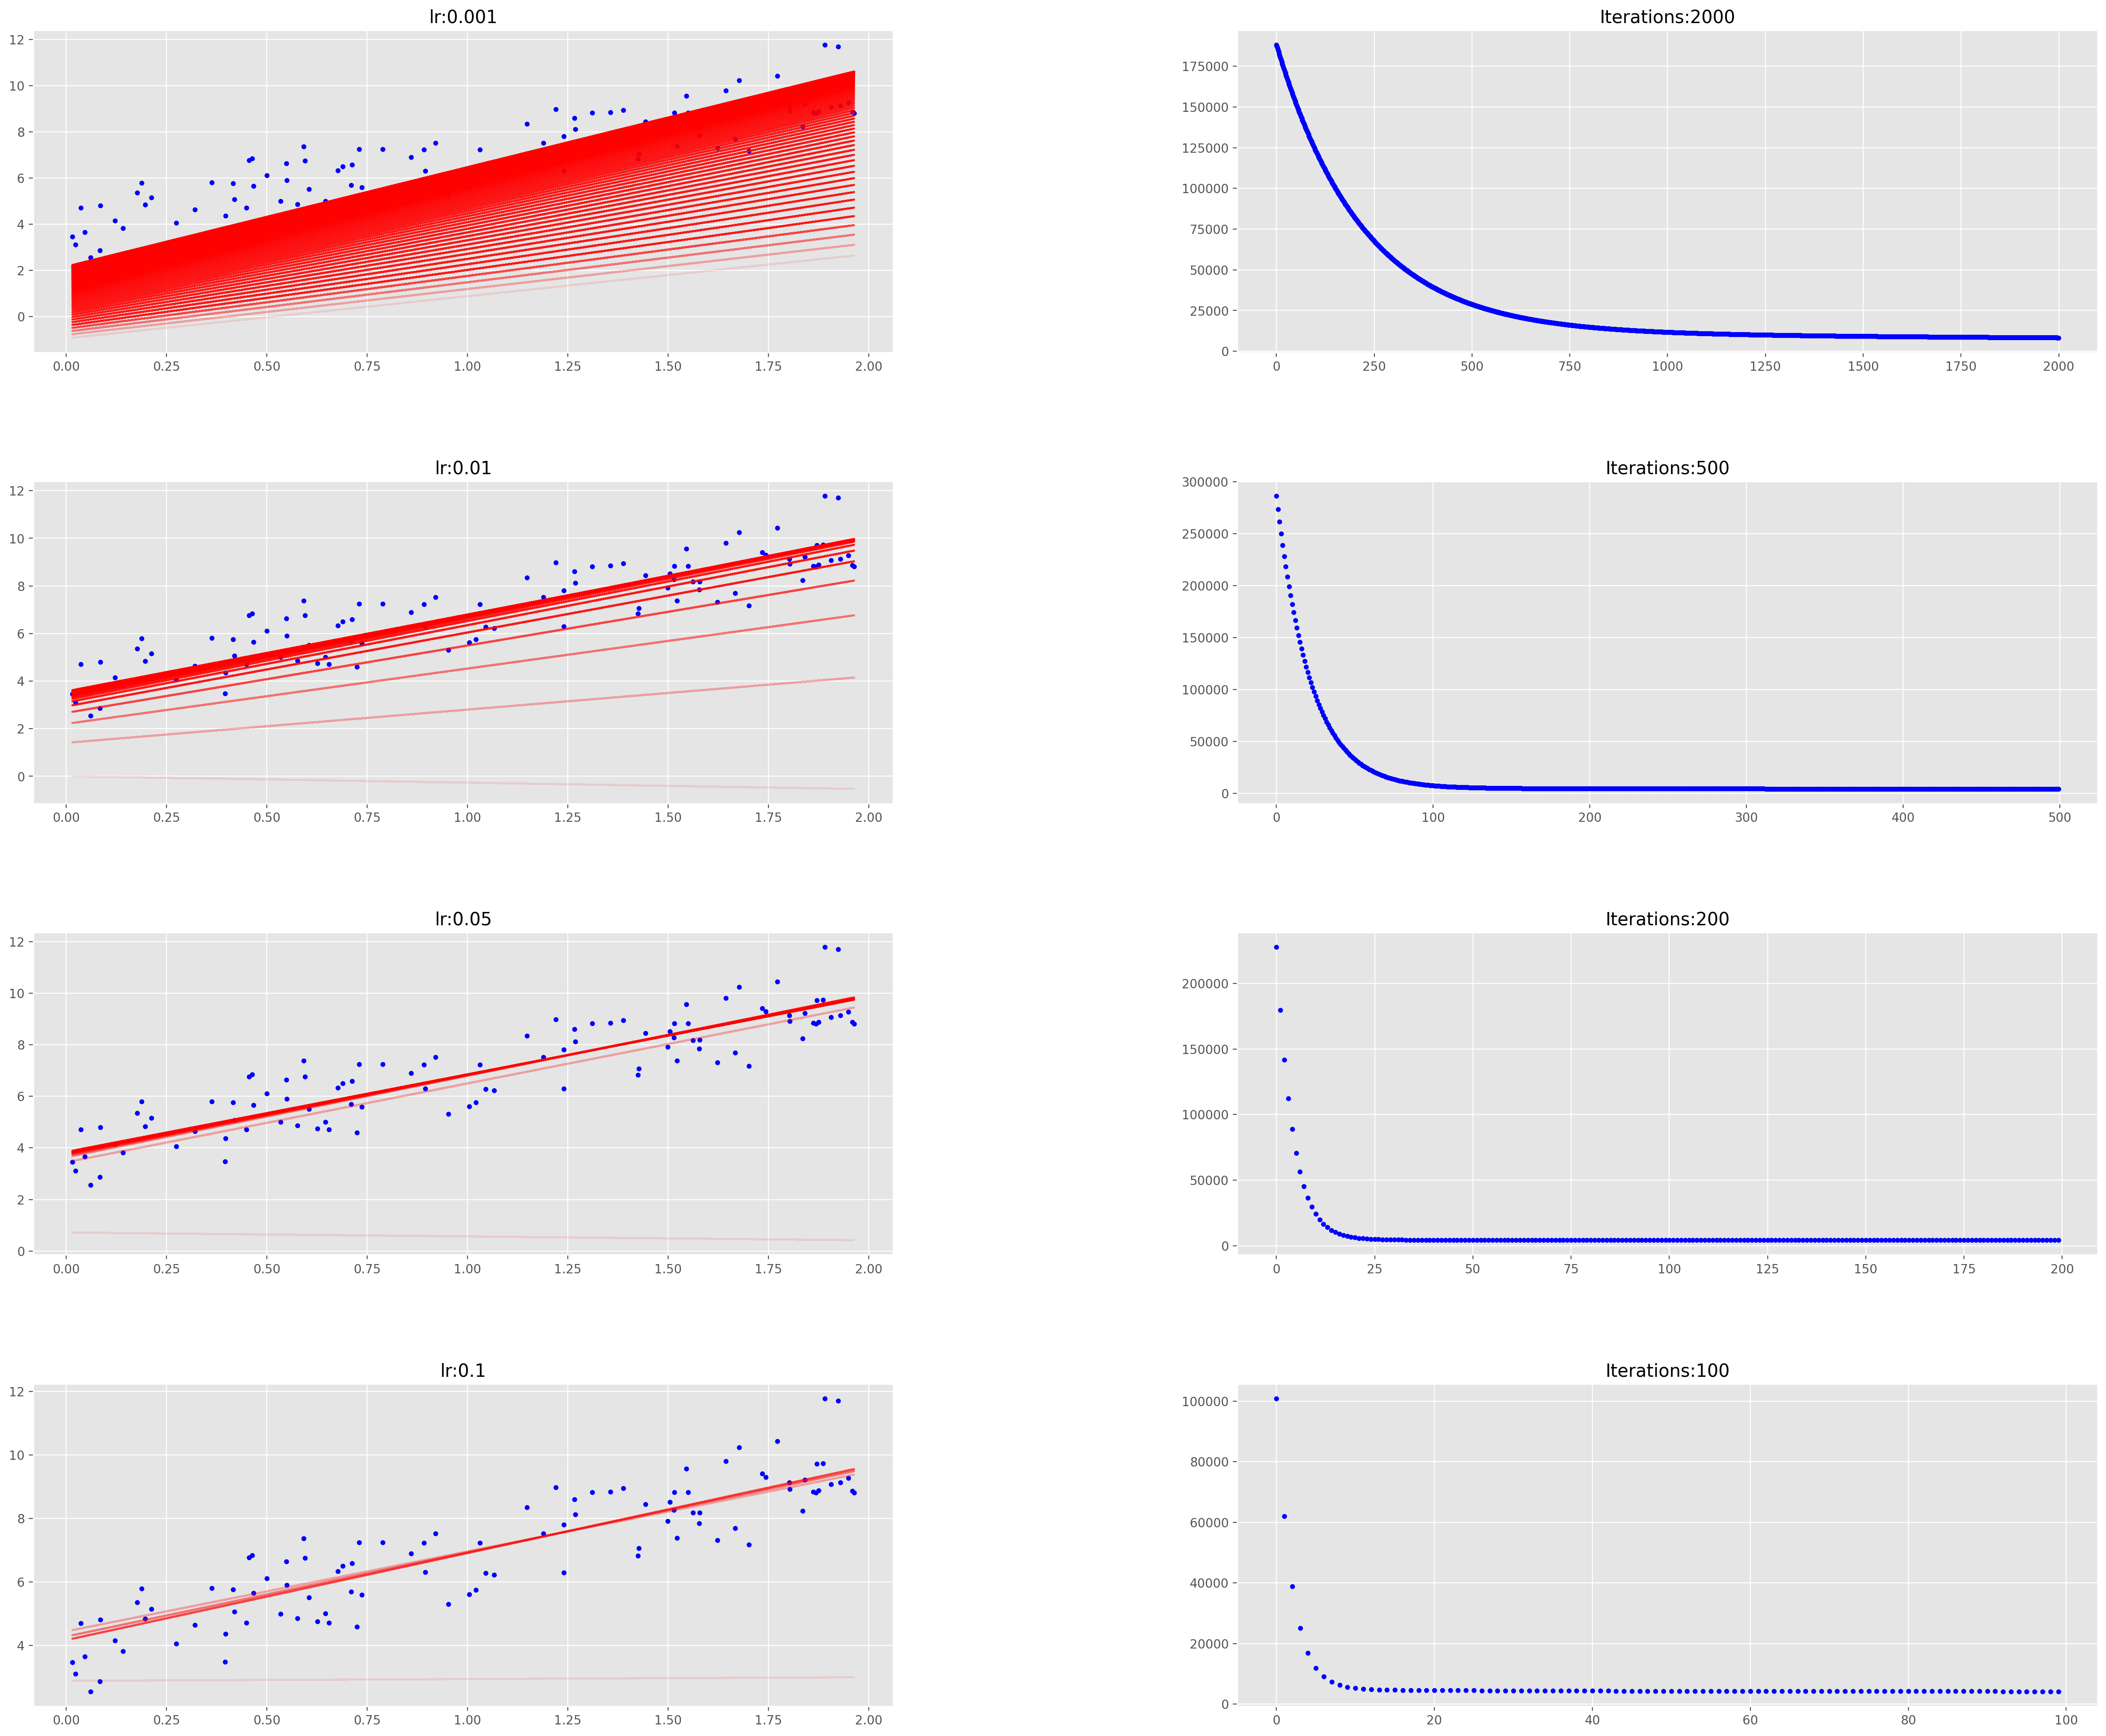

In [ ]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)
    